1. softmax regression and multi-class classification

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
x_train = [
  [1,2,1,1],
  [2,1,3,2],
  [3,1,3,4],
  [4,1,5,5],
  [1,7,5,5],
  [1,2,5,6],
  [1,6,6,6],
  [1,7,7,7]
]
y_train = [2,2,2,1,1,1,0,0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [5]:
model = nn.Linear(4, 3)

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
nb_epoch = 1000
for epoch in range(nb_epoch+1):
  prediction = model(x_train)
  cost = F.cross_entropy(prediction, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  if epoch % 100 == 0:
    print(f'epoch: {epoch}, cost: {cost}')

epoch: 0, cost: 2.1933581829071045
epoch: 100, cost: 0.6856405735015869
epoch: 200, cost: 0.6072153449058533
epoch: 300, cost: 0.5503005981445312
epoch: 400, cost: 0.4996661841869354
epoch: 500, cost: 0.4516884982585907
epoch: 600, cost: 0.40493831038475037
epoch: 700, cost: 0.3587559163570404
epoch: 800, cost: 0.3130914270877838
epoch: 900, cost: 0.26994839310646057
epoch: 1000, cost: 0.24274368584156036


In [8]:
new_var = torch.FloatTensor([[4,1,5,5]])
pred_y = F.softmax(model(new_var), dim=1)
print(pred_y)
print(pred_y.argmax().item())

tensor([[5.2707e-05, 7.7145e-01, 2.2850e-01]], grad_fn=<SoftmaxBackward0>)
1


In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import random

In [10]:
iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

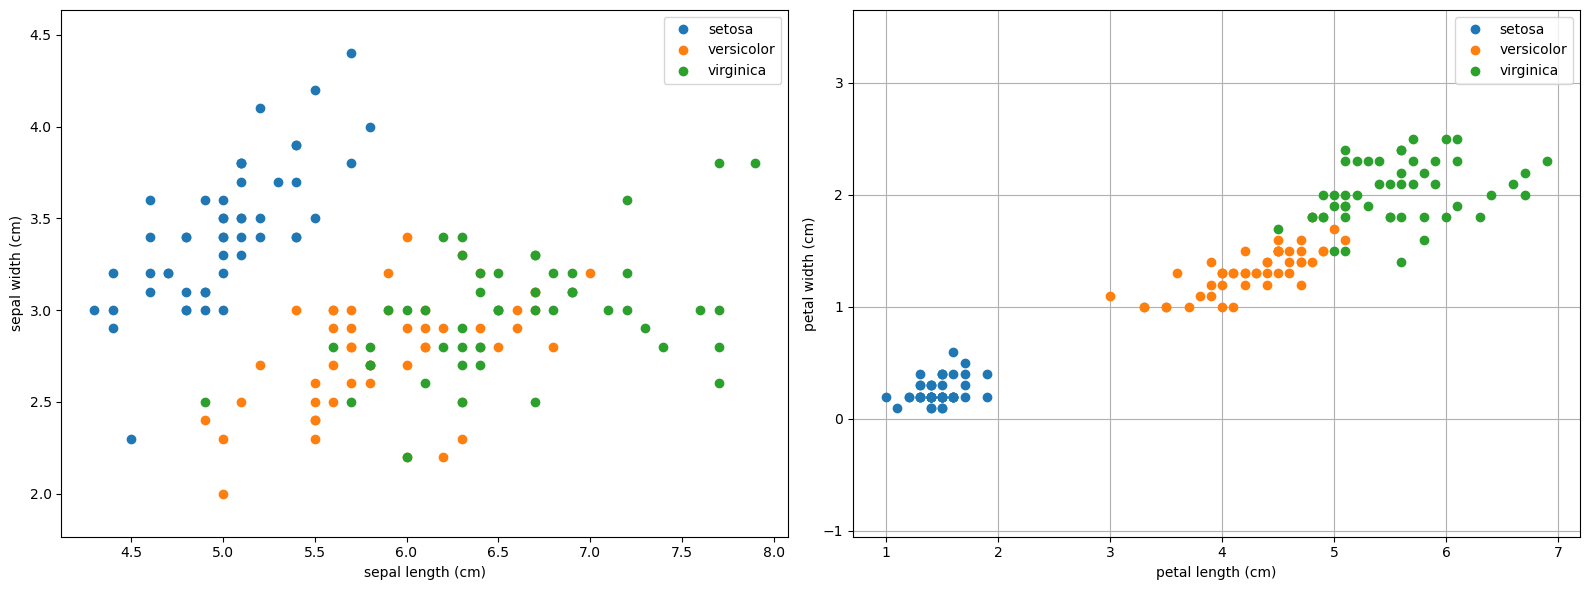

In [13]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
  x_plot = x[y == target]
  ax1.plot(x_plot[:, 0],
           x_plot[:, 1],
           linestyle='none',
           marker='o',
           label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()
for target, target_name in enumerate(names):
  x_plot = x[y == target]
  ax2.plot(x_plot[:, 2],
           x_plot[:, 3],
           linestyle='none',
           marker='o',
           label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()
plt.grid(True)
plt.tight_layout()


In [18]:
class MyIrisDataset(Dataset):
  def __init__(self, x_data, y_data) -> None:
    self.x_data = x_data
    self.y_data = y_data

  def __getitem__(self, index) -> tuple:
    return self.x_data[index].astype(np.float32),\
           self.y_data[index].astype(np.int64),

  def __len__(self):
    return len(self.x_data)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size=0.2, shuffle=True
)

In [19]:
train_dataset = MyIrisDataset(x_train, y_train)
test_dataset = MyIrisDataset(x_test, y_test)
train_dataloader = DataLoader(train_dataset, batch_size=10, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=10, shuffle=False, drop_last=False)


In [17]:
model = nn.Linear(4, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [20]:
nb_epoch = 1000
for epoch in range(nb_epoch+1):
  avg_cost = 0
  total_batch = len(train_dataloader)
  for idx, (x_train, y_train) in enumerate(train_dataloader):
    hypothesis = model(x_train)
    cost = criterion(hypothesis, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  if epoch % 100 == 0:
    print(f'epoch: {epoch}, cost: {cost}')

epoch: 0, cost: 0.7358585596084595
epoch: 100, cost: 0.11110524833202362
epoch: 200, cost: 0.05570285767316818
epoch: 300, cost: 0.013684272766113281
epoch: 400, cost: 0.027382493019104004
epoch: 500, cost: 0.007909318432211876
epoch: 600, cost: 0.10017980635166168
epoch: 700, cost: 0.001964233350008726
epoch: 800, cost: 0.0068321614526212215
epoch: 900, cost: 0.08040323853492737
epoch: 1000, cost: 0.003827646840363741


In [21]:
correc_prediction_list = []
with torch.no_grad():
  for idx, (x_test, y_test) in enumerate(test_dataloader):
    prediction = model(x_test)
    correc_prediction = torch.argmax(prediction, 1) == y_test
    correc_prediction_list.append(correc_prediction)
  correc_prediction_list = torch.cat(correc_prediction_list, dim=0)
  accuracy = correc_prediction_list.float().mean()
  print(f'accuracy: {accuracy.item()}')

accuracy: 0.9333333373069763


3. open dataset

In [22]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn as nn

from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
%matplotlib inline

import random

In [23]:
use_cuda = torch.cuda.is_available()
device = torch.device('cuda' if use_cuda else 'cpu')
print('training device', device)

training device cuda


In [24]:
training_epochs = 15
batch_size = 100

In [25]:
mnist_train = dsets.MNIST(root='data',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='data',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)


100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100.0%

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [26]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [27]:
model = nn.Linear(784, 10, bias=True).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [28]:
for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)
  for x, y in data_loader:
    x = x.view(-1, 28*28).to(device)
    y = y.to(device)

    optimizer.zero_grad()
    hypothesis = model(x)
    cost = criterion(hypothesis, y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print(f'epoch: {epoch}, cost: {avg_cost}')

epoch: 0, cost: 0.5352081656455994
epoch: 1, cost: 0.3591732084751129
epoch: 2, cost: 0.33117571473121643
epoch: 3, cost: 0.31648626923561096
epoch: 4, cost: 0.30704110860824585
epoch: 5, cost: 0.30027124285697937
epoch: 6, cost: 0.2948800325393677
epoch: 7, cost: 0.2907766103744507
epoch: 8, cost: 0.2873240113258362
epoch: 9, cost: 0.28447026014328003
epoch: 10, cost: 0.28189727663993835
epoch: 11, cost: 0.27974677085876465
epoch: 12, cost: 0.27772045135498047
epoch: 13, cost: 0.2759353518486023
epoch: 14, cost: 0.2743801474571228


In [29]:
with torch.no_grad():
  x_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
  y_test = mnist_test.test_labels.to(device)


  prediction = model(x_test)
  correc_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correc_prediction_list.float().mean()
  print(f'accuracy: {accuracy.item()}')

accuracy: 0.9333333373069763


/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


label: 3
prediction: 3


/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/secondvoca/anaconda3/envs/torch/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


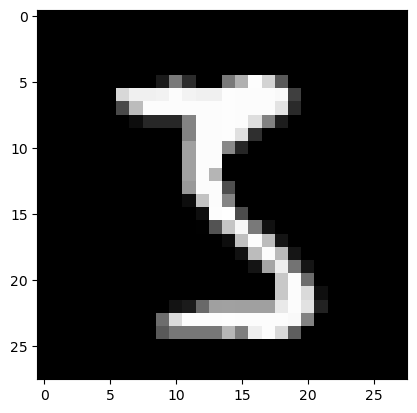

In [30]:
with torch.no_grad():
  r = random.randint(0, len(mnist_test) - 1)
  x_test = mnist_test.test_data[r].view(-1, 28*28).float().to(device)
  y_test = mnist_test.test_labels[r].to(device)

  print(f'label: {y_test.item()}')
  prediction = model(x_test)
  print(f'prediction: {torch.argmax(prediction, 1).item()}')

  plt.imshow(mnist_test.test_data[r].view(28, 28),
             cmap='gray',
             interpolation='nearest')